# Appendix
# Q1:

In [1]:
import numpy as np
import math
import random
from matplotlib import pyplot as plt
from IPython.display import clear_output

In [2]:
def get_rand_number(min_value, max_value):
    range = max_value - min_value
    choice = random.uniform(0,1)
    return min_value + range*choice

In [3]:
def f(x):
    return (3*x+x**2-200*math.cos(x))

In [4]:
def crude_monte_carlo(num_samples=10000):
    lower_bound = 1
    upper_bound = 8
    
    sum_of_samples = 0
    X = []
    for i in range(num_samples):
        x = get_rand_number(lower_bound, upper_bound)
        sum_of_samples += f(x)
        X.append(f(x)*7)
    
    monte_carlo = (upper_bound - lower_bound) * float(sum_of_samples/num_samples)
    
    return monte_carlo, X

In [5]:
groud_truth = 235.26
MC_score, X = crude_monte_carlo()
low = np.mean(X)-1.96*np.std(X)/math.sqrt(10000)
up = np.mean(X)+1.96*np.std(X)/math.sqrt(10000)
print('Result is:', MC_score, '\nWith confidence interval [', low, ',', up, ']')

Result is: 240.27140391531992 
With confidence interval [ 223.57334561106956 , 256.9694622195686 ]


# Q3:

(a)

In [1]:
import pandas as pd
from sklearn import preprocessing

In [2]:
def LabelEncode(data):
    le = preprocessing.LabelEncoder()
    le.fit(data)
    return le.transform(data)

In [3]:
df = pd.read_csv('Hitters.csv')
df['League'] = LabelEncode(df['League'])
df['Division'] = LabelEncode(df['Division'])
df['NewLeague'] = LabelEncode(df['NewLeague'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    int32  
 14  Division   263 non-null    int32  
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    int32  
dtypes: float64

In [4]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,315,81,7,24,38,39,14,3449,835,69,321,414,375,1,1,632,43,10,475.0,1
1,479,130,18,66,72,76,3,1624,457,63,224,266,263,0,1,880,82,14,480.0,0
2,496,141,20,65,78,37,11,5628,1575,225,828,838,354,1,0,200,11,3,500.0,1
3,321,87,10,39,42,30,2,396,101,12,48,46,33,1,0,805,40,4,91.5,1
4,594,169,4,74,51,35,11,4408,1133,19,501,336,194,0,1,282,421,25,750.0,0


(b)

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
y = df.iloc[:, -2]
X = df.drop(columns=['Salary'])
lm = LinearRegression().fit(X, y)

In [6]:
score = -1*cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')   
score.mean()

116599.01367380263

In [7]:
score

array([109666.77700983,  37953.39175639, 156572.05727236,  82386.07551784,
        84002.24855686,  67162.76201476, 270025.66135176, 135034.86873316,
       132156.31388783,  91029.98063725])

(c)

In [8]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

df_scale = pd.read_csv('Hitters.csv')
df_scale['League'] = LabelEncode(df['League'])
df_scale['Division'] = LabelEncode(df['Division'])
df_scale['NewLeague'] = LabelEncode(df['NewLeague'])

y = df_scale['Salary']
X_scale = df_scale.drop(['Salary'], axis=1)

X_scale

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,NewLeague
0,315,81,7,24,38,39,14,3449,835,69,321,414,375,1,1,632,43,10,1
1,479,130,18,66,72,76,3,1624,457,63,224,266,263,0,1,880,82,14,0
2,496,141,20,65,78,37,11,5628,1575,225,828,838,354,1,0,200,11,3,1
3,321,87,10,39,42,30,2,396,101,12,48,46,33,1,0,805,40,4,1
4,594,169,4,74,51,35,11,4408,1133,19,501,336,194,0,1,282,421,25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,497,127,7,65,48,37,5,2703,806,32,379,311,138,1,0,325,9,3,1
259,492,136,5,76,50,94,12,5511,1511,39,897,451,875,0,0,313,381,20,0
260,475,126,3,61,43,52,6,1700,433,7,217,93,146,0,1,37,113,7,0
261,573,144,9,85,60,78,8,3198,857,97,470,420,332,0,0,1314,131,12,0


In [9]:
from sklearn.preprocessing import scale 
pca = PCA()
X_scale = pca.fit_transform(scale(X_scale))

MSE with 1 components: 123924.13089980235
MSE with 2 components: 125219.8186020469
MSE with 3 components: 125936.4971858609
MSE with 4 components: 123338.38059497121
MSE with 5 components: 120267.60729131899
MSE with 6 components: 118508.15848939032
MSE with 7 components: 118789.33335711618
MSE with 8 components: 119588.5389074013
MSE with 9 components: 120446.2134914831
MSE with 10 components: 122072.10474467053
MSE with 11 components: 122818.16267921466
MSE with 12 components: 123533.98633524492
MSE with 13 components: 123501.9866236398
MSE with 14 components: 119791.3805164588
MSE with 15 components: 120171.99674286325
MSE with 16 components: 116609.51312630429
MSE with 17 components: 116359.68557326547
MSE with 18 components: 115083.91154069177
MSE with 19 components: 116599.0136738026


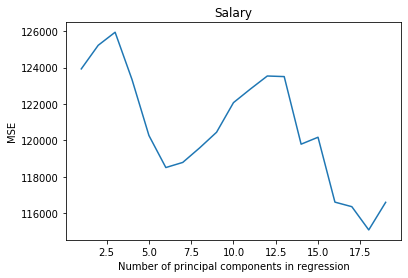

In [12]:
n = len(X_scale)

lm_scale = LinearRegression()
mse = []

score = -1*cross_val_score(lm_scale, X_scale, y, cv=10, scoring='neg_mean_squared_error').mean()

for i in range(1, 20):
    score = -1*cross_val_score(lm_scale, X_scale[:,:i], y.ravel(), cv=10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    print('MSE with', i, 'components:', score)
    
plt.plot(range(1,20), mse)
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary');

(d)

C:\Users\simon\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\simon\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\simon\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10851678.946922295, tolerance: 5077.3603631314545
  positive)
C:\Users\simon\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sim

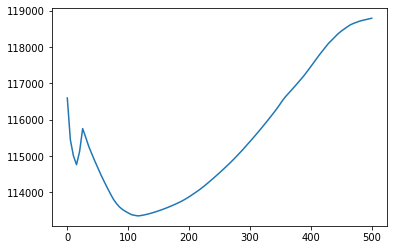

In [14]:
from sklearn import linear_model
alphas = np.linspace(0, 500, num=100)

lasso_mse = []
for alpha in alphas:
    lasso = linear_model.Lasso(alpha=alpha, max_iter=10000000)
    score = -1*cross_val_score(lasso, X, y, cv=10, scoring='neg_mean_squared_error').mean()
    lasso_mse.append(score)
    
plt.plot(alphas, lasso_mse)

In [15]:
from sklearn import linear_model
alphas = np.linspace(110, 120, num=100)

In [16]:
lasso_mse = []
for alpha in alphas:
    lasso = linear_model.Lasso(alpha=alpha, max_iter=10000000)
    score = -1*cross_val_score(lasso, X, y, cv=10, scoring='neg_mean_squared_error').mean()
    lasso_mse.append(score)

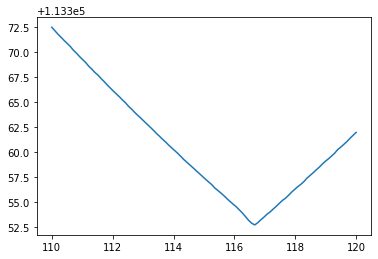

In [17]:
plt.plot(alphas, lasso_mse)

In [18]:
print('The best lambda is:', alphas[lasso_mse.index(min(lasso_mse))])

The best lambda is: 116.66666666666667


In [19]:
lasso = linear_model.Lasso(alpha=alphas[lasso_mse.index(min(lasso_mse))], max_iter=10000000)
print('The MSE is:', -1*cross_val_score(lasso, X, y, cv=10, scoring='neg_mean_squared_error').mean())

The MSE is: 113352.68244494035


# Q2

Ref: http://thatdatatho.com/2018/10/04/cross-validation-the-wrong-way-right-way-feature-selection/

# Q4

Ref: https://www.win.tue.nl/~marko/2WB05/lecture8.pdf

# Q5

Ref: https://books.google.com.au/books?id=Trj9HQ7G8TUC&pg=PA384&lpg=PA384&dq=relative+error+of+the+estimator++in+CMC&source=bl&ots=1EZbEg3azG&sig=ACfU3U03XjPxPwZzvEW641zHuEDTAWEoCg&hl=en&sa=X&ved=2ahUKEwiGhur66MvpAhV28XMBHb0pBJIQ6AEwAXoECAkQAQ#v=onepage&q=relative%20error%20of%20the%20estimator%20%20in%20CMC&f=false